In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
titanic = pd.read_csv('../data_sets/day7/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 将PassengerId设置为索引

In [4]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. 绘制一个展示男女乘客比例的扇形图

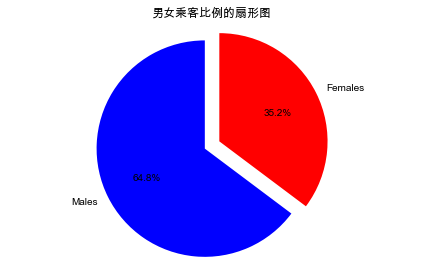

In [23]:
df = titanic.groupby('Sex')['PassengerId'].count()
males = df['male']
females = df['female']
all = [males, females]

plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
plt.pie(all,labels=['Males', 'Females'],shadow=False,
        colors=['blue', 'red'], explode=[0.15, 0], startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.title('男女乘客比例的扇形图')
plt.tight_layout()
plt.show()

3. 绘制一个展示船票Fare, 与乘客年龄和性别的散点图

(-5, 85)

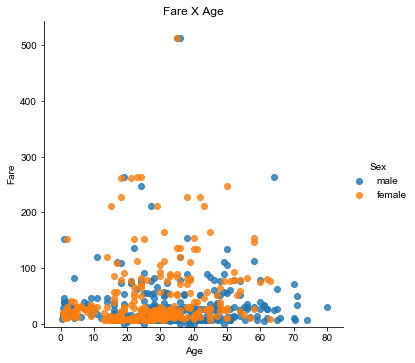

In [24]:
lm = sns.lmplot(x='Age', y='Fare', data=titanic, hue='Sex', fit_reg=False)
lm.set(title='Fare X Age')
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

4. 有多少人生还？

In [25]:
titanic.Survived.sum()

342

5. 绘制一个展示船票价格的直方图

In [27]:
df = titanic.Fare.sort_values(ascending=False)
df.head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

In [28]:
binsVal = np.arange(0, 600, 10)
binsVal

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590])

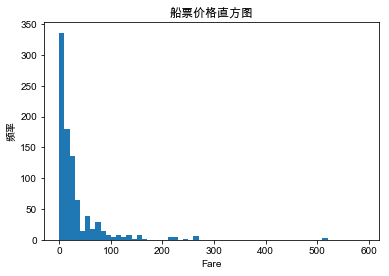

In [30]:
plt.hist(df, bins=binsVal)
plt.xlabel('Fare')
plt.ylabel('频率')
plt.title('船票价格直方图')
plt.show()